### Color correction
Adjustment of color balance, saturation and hue to achieve natural or desired colors.

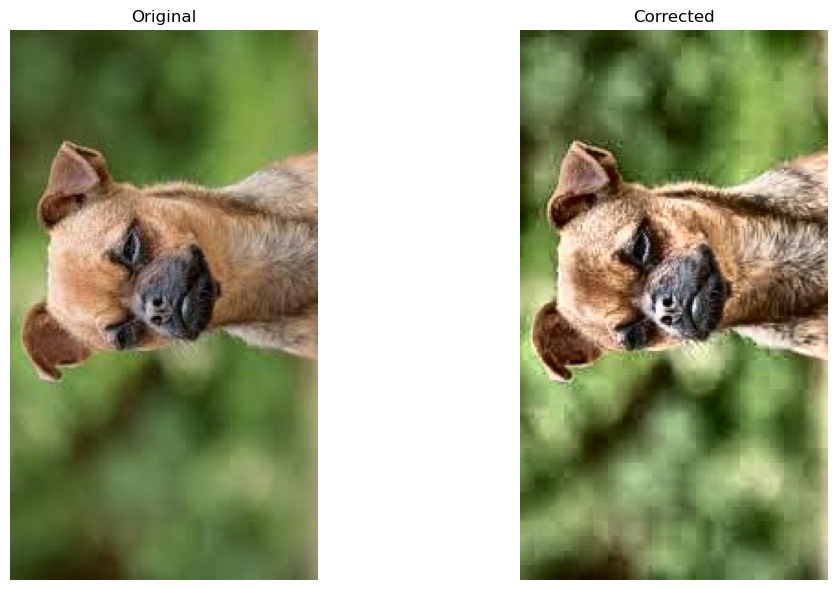

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_correction(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final

# Read image
img = cv2.imread('images/dog.jpg')

# Apply color correction
corrected = color_correction(img)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
corrected_rgb = cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB)

# Show images
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img_rgb)
plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(corrected_rgb)
plt.title('Corrected'), plt.axis('off')
plt.tight_layout()
plt.show()


### Rectification
Correction of geometric distortions that can be caused by camera lenses or perspective.

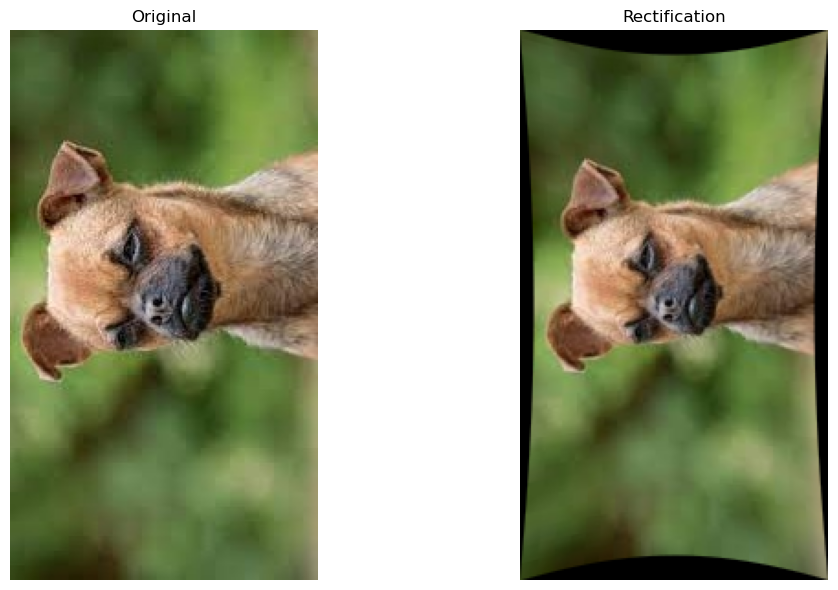

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def undistort(image, k1, k2, p1, p2):
    h, w = image.shape[:2]
    camera_matrix = np.array([[w, 0, w/2], [0, h, h/2], [0, 0, 1]], dtype=np.float32)
    dist_coeffs = np.array([k1, k2, p1, p2, 0], dtype=np.float32)
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w,h), 1, (w,h))
    dst = cv2.undistort(image, camera_matrix, dist_coeffs, None, newcameramtx)
    return dst

img = cv2.imread('images/dog.jpg')
undistorted = undistort(img, -0.3, 0.1, 0, 0)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
undistorted_rgb = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img_rgb)
plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(undistorted_rgb)
plt.title('Rectification'), plt.axis('off')
plt.tight_layout()
plt.show()

### Deconvolution
Mathematical technique for sharpening images by reversing the blur function

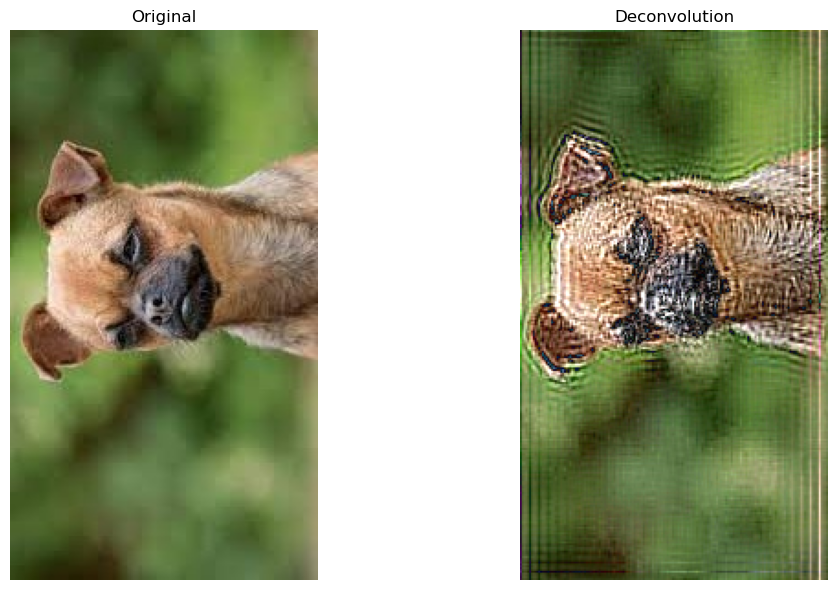

In [6]:
import numpy as np
from scipy import signal
import cv2
import matplotlib.pyplot as plt

def wiener_deconvolution(image, kernel, K):
    kernel /= np.sum(kernel)
    
    # Process each color channel separately
    result = np.zeros_like(image, dtype=float)
    for i in range(3):  # For each color channel (BGR)
        dummy = np.fft.fft2(image[:,:,i])
        kernel_fft = np.fft.fft2(kernel, s=image[:,:,i].shape)
        kernel_fft = np.conj(kernel_fft) / (np.abs(kernel_fft)**2 + K)
        dummy = dummy * kernel_fft
        result[:,:,i] = np.abs(np.fft.ifft2(dummy))
    
    return np.clip(result, 0, 255).astype(np.uint8)

img = cv2.imread('images/dog.jpg')
if img is None:
    raise ValueError("Image could not be loaded. Check the path.")

kernel = np.ones((5,5)) / 25
deconvolved = wiener_deconvolution(img, kernel, K=0.01)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
deconvolved_rgb = cv2.cvtColor(deconvolved, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img_rgb)
plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(deconvolved_rgb)
plt.title('Deconvolution'), plt.axis('off')
plt.tight_layout()
plt.show()

### Super-Resolution
Techniques for increasing the image resolution beyond the original recording resolution.

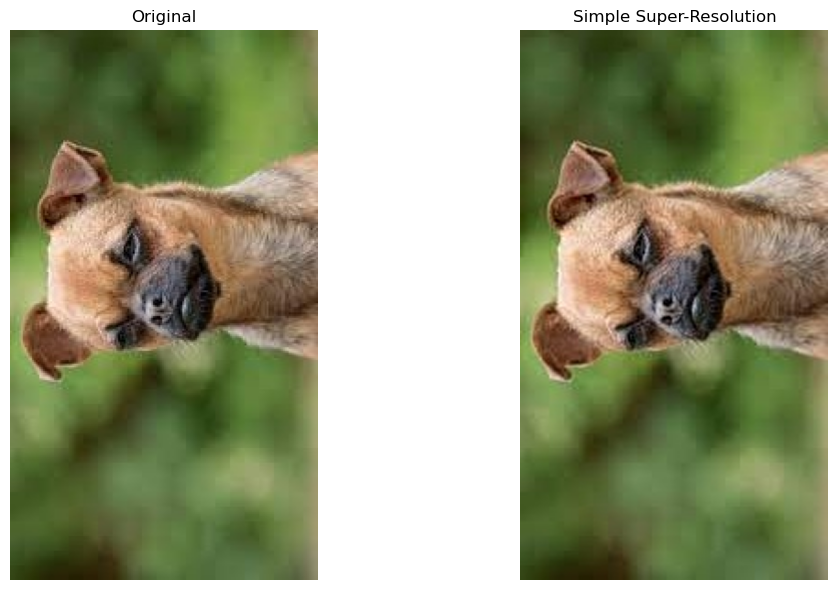

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def simple_super_resolution(image, scale=2):
    return cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

img = cv2.imread('images/dog.jpg')

if img is None:
    print("Error loading the image. Check the path.")
else:
    upscaled = simple_super_resolution(img)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    upscaled_rgb = cv2.cvtColor(upscaled, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12,6))
    plt.subplot(121), plt.imshow(img_rgb)
    plt.title('Original'), plt.axis('off')
    plt.subplot(122), plt.imshow(upscaled_rgb)
    plt.title('Simple Super-Resolution'), plt.axis('off')
    plt.tight_layout()
    plt.show()

### Image segmentation
Separation of foreground and background or objects in the image for further processing steps

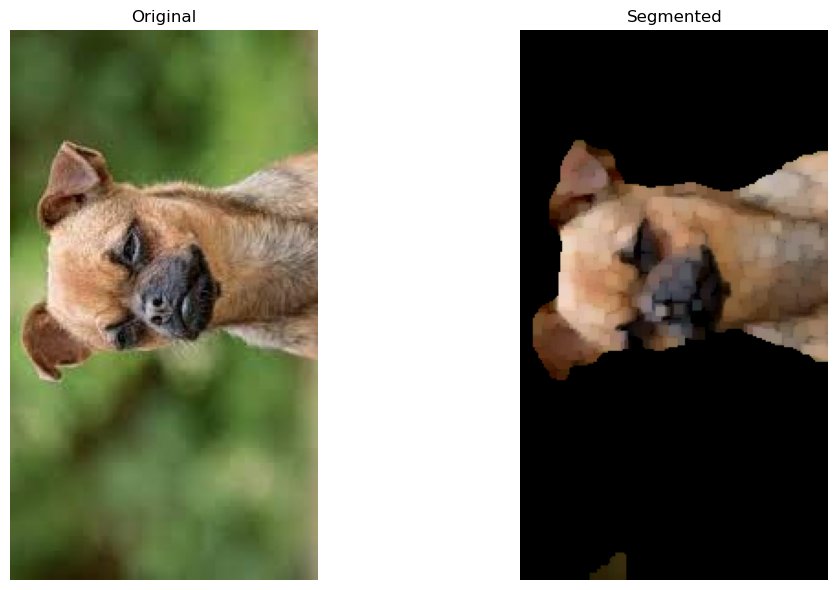

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the area for the green background
    lower_green = np.array([25, 25, 25])  # Lower limit for green
    upper_green = np.array([80, 255, 255])  # upper limit for greent
    
    # Create a mask for the green background
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # Invert the mask to isolate the dog
    mask_dog = cv2.bitwise_not(mask_green)
    
    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask_dog)
    
    # Optional: Apply morphological operations to improve the result
    kernel = np.ones((5, 5), np.uint8)
    segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel)
    
    return segmented_image

# Load the image
img = cv2.imread('images/dog.jpg')
segmented = segment_image(img)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img_rgb)
plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(segmented_rgb)
plt.title('Segmented'), plt.axis('off')
plt.tight_layout()
plt.show()

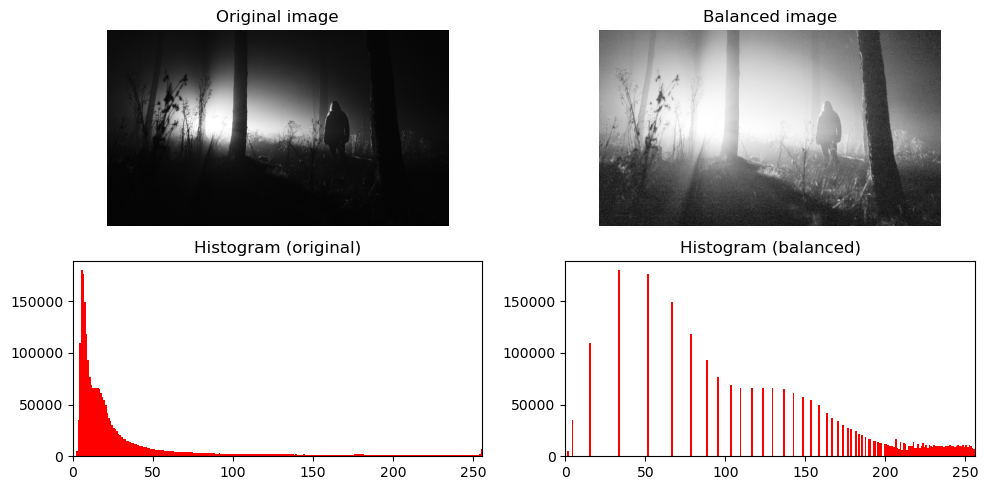

True

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/darkImage.jpg', 0)

if img is None:
    print("Fehler beim Laden des Bildes")
    exit()


# Perform histogram equalization
img_equalized = cv2.equalizeHist(img)

# Show results
plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(222)
plt.imshow(img_equalized, cmap='gray')
plt.title('Balanced image')
plt.axis('off')

plt.subplot(223)
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.title('Histogram (original)')
plt.xlim([0, 256])

plt.subplot(224)
plt.hist(img_equalized.flatten(), 256, [0, 256], color='r')
plt.title('Histogram (balanced)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# Bild speichern
cv2.imwrite('equalized_image.jpg', img_equalized)


### Types and variants of histogram equalization for images
There are different types and variants of histogram equalization for images. These different methods offer flexibility in image enhancement and can be used depending on the application and desired result. Each method has its specific advantages and disadvantages in terms of contrast enhancement, detail preservation and possible artifacts.

Each of these methods has its own strengths and can be effective in different ways depending on the application and the desired result. Experiment with different methods and parameters to achieve the best result for your specific image.

### Global histogram equalization
This is the classic method in which the histogram of the entire image is evenly distributed. It improves the global contrast, but can lead to excessive contrast enhancement in some cases.

(<Axes: >, <matplotlib.image.AxesImage at 0x7f719b1f08e0>)

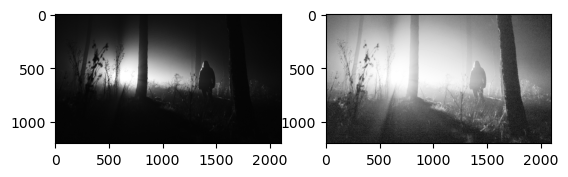

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/darkImage.jpg', 0)
eq_img = cv2.equalizeHist(img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')

### Adaptive Histogram Equalization (AHE):
This method divides the image into smaller areas (tiles) and applies the histogram equalization to each tile separately. This results in better local contrast enhancement, especially for images with different lighting conditions.

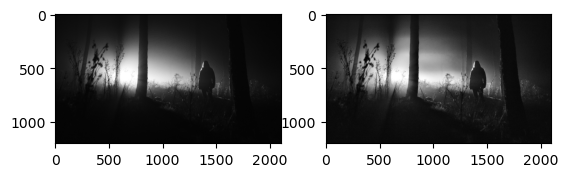

In [22]:
from skimage import exposure
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/darkImage.jpg', 0)
eq_img = exposure.equalize_adapthist(img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')
plt.show()

### Contrast Limited Adaptive Histogram Equalization (CLAHE):
An enhancement of AHE that introduces a limit on contrast to reduce over-enhancement and noise amplification

(<Axes: >, <matplotlib.image.AxesImage at 0x7f71ac544c70>)

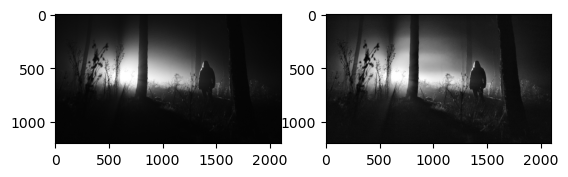

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/darkImage.jpg', 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_img = clahe.apply(img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')

### Histogram stretching:
This technique stretches the histogram over the entire available gray value range. A certain percentage of the darkest and lightest pixels are often mapped to the extreme values.

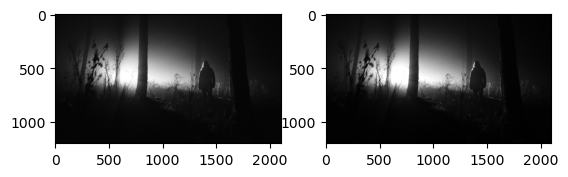

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stretch_hist(img, lower_percent=1, upper_percent=99):
    low_in = np.percentile(img, lower_percent)
    high_in = np.percentile(img, upper_percent)
    out = np.clip(img, low_in, high_in)
    out = (out - low_in) / (high_in - low_in) * 255
    return out.astype(np.uint8)

img = cv2.imread('images/darkImage.jpg', 0)
eq_img = stretch_hist(img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')
plt.show()

### Histogram shrinking:
This transforms the gray values into a narrower range of values. This can be useful to emphasize certain areas of the image.

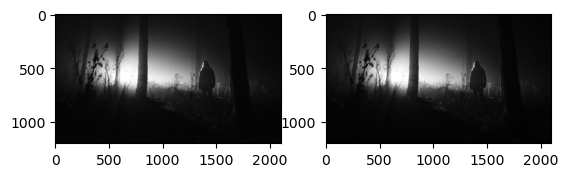

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shrink_hist(img, min_out=50, max_out=200):
    min_in, max_in = img.min(), img.max()
    out = (img - min_in) / (max_in - min_in) * (max_out - min_out) + min_out
    return out.astype(np.uint8)

img = cv2.imread('images/darkImage.jpg', 0)
eq_img = shrink_hist(img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')
plt.show()

### Piecewise linear histogram transformation:
With this method, different sections of the histogram can be spread or compressed to different degrees.

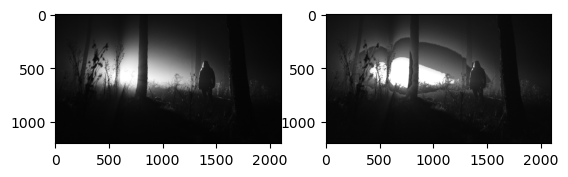

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_transform(img, breakpoints, slopes):
    lut = np.zeros(256, dtype=np.uint8)
    last_bp = 0
    for bp, slope in zip(breakpoints, slopes):
        lut[last_bp:bp] = np.clip(np.round(np.arange(last_bp, bp) * slope), 0, 255)
        last_bp = bp
    lut[last_bp:] = np.clip(np.round(np.arange(last_bp, 256) * slopes[-1]), 0, 255)
    return cv2.LUT(img, lut)

img = cv2.imread('images/darkImage.jpg', 0)
eq_img = piecewise_linear_transform(img, [64, 192], [1.5, 0.7, 1.2])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')
plt.show()

### Histogram limitation:
Here, gray values outside a certain range are mapped to black or white, followed by contrast enhancement in the remaining range.

(<Axes: >, <matplotlib.image.AxesImage at 0x7f71aef18c70>)

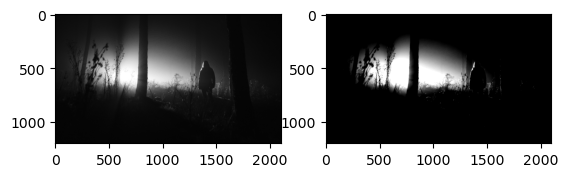

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def limit_histogram(img, lower_limit=50, upper_limit=200):
    out = np.clip(img, lower_limit, upper_limit)
    out = ((out - lower_limit) / (upper_limit - lower_limit) * 255).astype(np.uint8)
    return out

img = cv2.imread('images/darkImage.jpg', 0)
eq_img = limit_histogram(img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(eq_img, cmap='gray')

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('images/darkImage.jpg', 0)
cv2.imshow('grayscale image', image)
cv2.waitKey(0) 
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
